# 1. SciKit Basic Models

In [2]:
'''
This is a notebook that tests various machine learning models that aims to predict the future top-100 average of track and field events.
Created on Monday, April 1st, 2024
Author: Matt Goeckel
'''
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
print("Libraries Imported")

Libraries Imported


In [3]:
# Load the data
df = pd.read_csv('top100avg.csv')

# Preprocess the data
le = LabelEncoder()
# For 'Division'
le_division = LabelEncoder()
df['Division'] = le_division.fit_transform(df['Division'])
print("Division Label Encoding:")
print(list(le_division.classes_))
print(list(le_division.transform(le_division.classes_)))

# For 'Sex'
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
print("\nSex Label Encoding:")
print(list(le_sex.classes_))
print(list(le_sex.transform(le_sex.classes_)))

# For 'Event'
le_event = LabelEncoder()
df['Event'] = le_event.fit_transform(df['Event'])
print("\nEvent Label Encoding:")
print(list(le_event.classes_))
print(list(le_event.transform(le_event.classes_)))

# Split the data into features and target
X = df.iloc[:, :4]  # columns 1-4 are your features
y = df.iloc[:, 4]  # column 5 is your target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Division Label Encoding:
['Kansas 1A', 'Kansas 3A', 'Kansas 6A', 'NAIA', 'NCAA D-I', 'NCAA D-II', 'NCAA D-III', 'World']
[0, 1, 2, 3, 4, 5, 6, 7]

Sex Label Encoding:
['Men', 'Women']
[0, 1]

Event Label Encoding:
['10000m', '100m', '1500m', '1600m', '200m', '3200m', '400m', '5000m', '800m', 'Discus', 'High Jump', 'Javelin', 'Long Jump', 'Pole Vault', 'Shot Put', 'Triple Jump']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


<table>
<tr><th colspan="3">Label Encoding Key</th></tr>
<tr><td>

| Label | Division   |
|-------|------------|
| 0     | Kansas 1A  |
| 1     | Kansas 3A  |
| 2     | Kansas 6A  |
| 3     | NAIA       |
| 4     | NCAA D-I   |
| 5     | NCAA D-II  |
| 6     | NCAA D-III |
| 7     | World      |

</td><td>

| Label | Sex   |
|-------|-------|
| 0     | Men   |
| 1     | Women |

</td><td>

| Label | Event       |
|-------|-------------|
| 0     | 10000m      |
| 1     | 100m        |
| 2     | 1500m       |
| 3     | 1600m       |
| 4     | 200m        |
| 5     | 3200m       |
| 6     | 400m        |
| 7     | 5000m       |
| 8     | 800m        |
| 9     | Discus      |
| 10    | High Jump   |
| 11    | Javelin     |
| 12    | Long Jump   |
| 13    | Pole Vault  |
| 14    | Shot Put    |
| 15    | Triple Jump |

</td></tr> </table>

In [103]:
# Uncomment the next line if the lasso model fails to converge with the default number of iterations
#lasso_model = make_pipeline(StandardScaler(), Lasso(max_iter=10000))

In [4]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Support Vector Regression', SVR()),
    ('Gradient Boosting Regression', GradientBoostingRegressor())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('RMSE:', root_mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R^2:', r2_score(y_test, y_pred))

Linear Regression
RMSE: 119.31957616989372
MAE: 96.4527208374359
R^2: 0.7038966624016619
Ridge Regression
RMSE: 119.32147107544205
MAE: 96.45635296187892
R^2: 0.7038872575356607
Lasso Regression
RMSE: 119.42547755645741
MAE: 96.69881150292031
R^2: 0.7033708196067124
Decision Tree Regression
RMSE: 19.21529373253277
MAE: 12.483245149911816
R^2: 0.9923208358026246
Random Forest Regression
RMSE: 16.860764934601697
MAE: 11.098571428571427
R^2: 0.9940874551797613
Support Vector Regression
RMSE: 221.15962115763065
MAE: 185.68915568404876
R^2: -0.017259075756280273
Gradient Boosting Regression
RMSE: 39.07532934986605
MAE: 27.949527103492013
R^2: 0.9682440438957443


Model Performance
| Model                     | RMSE       | MAE        | R^2       |
|---------------------------|------------|------------|-----------|
| Linear Regression         | 117.72177  | 95.72364   | 0.71382   |
| Ridge Regression          | 117.72402  | 95.72757   | 0.71381   |
| Lasso Regression          | 117.89145  | 96.06475   | 0.71299   |
| Decision Tree Regression  | 22.18599   | 13.01396   | 0.98984   |
| Random Forest Regression  | 17.06535   | 10.74354   | 0.99399   |
| Support Vector Regression | 221.39544  | 184.32384  | -0.01220  |
| Gradient Boosting Regression | 39.44551 | 28.18553   | 0.96787   |

In [5]:
# Create an instance of the Random Forest Regression model
model = RandomForestRegressor()

# Fit the model with the training data
model.fit(X_train, y_train)

RandomForestRegressor()

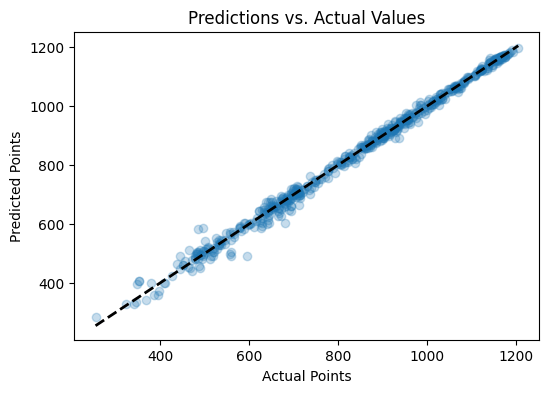

In [11]:
import matplotlib.pyplot as plt

# Make Predictions
rf_predictions = model.predict(X_test)

# Plot actual vs. predicted values for the Random Forest model
plt.figure(figsize=(6, 4))
plt.scatter(y_test, rf_predictions, alpha=0.25) 

plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()

Let's try and run a simulation for an event in 2024

In [106]:
import pointCalculator

# Create a new data point with the given parameters
data23 = pd.DataFrame({'Event': [6], 'Division': [7], 'Sex': [0], 'Year': [2023]})

# Use the model to predict the score value for the new data point
score = model.predict(data23)

time = pointCalculator.calculateResult('Men', '400m', score)

# Print the predicted score value
print('Men 400m World 2023: ' + str(score))
print('Time: ' + str(time))

# Create a new data point with the given parameters
data24 = pd.DataFrame({'Event': [6], 'Division': [7], 'Sex': [0], 'Year': [2024]})

# Use the model to predict the score value for the new data point
score = model.predict(data24)

time = pointCalculator.calculateResult('Men', '400m', score)

# Print the predicted score value
print('Men 400m World 2024: ' + str(score))
print('Time: ' + str(time))


Men 400m World 2023: [1185.56]
Time: 44.9239773694849
Men 400m World 2024: [1185.56]
Time: 44.9239773694849


Model is accurate only for 2010-2023. All years outside this range return values for 2010 (if older) or 2023 (if future)

# 2. Time Series Models


In [107]:
df.head()

,Event,Division,Sex,Year,Points
0,0,3,0,2010,777
1,0,3,0,2011,813
2,0,3,0,2012,758
3,0,3,0,2013,767
4,0,3,0,2014,767


In [108]:
from statsmodels.tsa.api import VAR

# Ensure data is sorted by 'Year'
df.sort_values(by='Year', inplace=True)

# Split data into training (2010-2021) and testing (2022-2023) sets
train_data = df[df['Year'].between(2010, 2021)]
test_data = df[df['Year'].between(2022, 2023)]

# Select relevant columns for modeling
train_data = train_data[['Event', 'Division', 'Sex', 'Year', 'Points']]
test_data = test_data[['Event', 'Division', 'Sex', 'Year', 'Points']]

# Train VAR model
model = VAR(train_data.drop(columns=['Year']))
model_fitted = model.fit()

# Get actual vs forecasted values for testing set
actual_values = test_data['Points'].values
forecast_values = model_fitted.forecast(test_data.drop(columns=['Year']).values, steps=len(test_data))[:, -1]

# Calculate and print evaluation metrics
rmse = root_mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
r2 = r2_score(actual_values, forecast_values)
print("Evaluation Metrics for Testing Set:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared (R^2):", r2)

Evaluation Metrics for Testing Set:
RMSE: 215.25424835603542
MAE: 182.99602242516647
R-squared (R^2): -0.006542316642024204


c:\Users\mattg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [80]:
from prophet import Prophet

# Assuming your dataframe is named 'df' and it has 'Year' column for dates and 'Points' column for values
# Preprocess data
df_p = df
df_p.rename(columns={'Year': 'ds', 'Points': 'y'}, inplace=True)
df_p['ds'] = pd.to_datetime(df_p['ds'], format='%Y')
#print(df_p.head())

# Split data into training (2010-2021) and testing (2022-2023) sets
train_data = df_p[df_p['ds'] < pd.to_datetime('2022-01-01')]
test_data = df_p[df_p['ds'] >= pd.to_datetime('2022-01-01')]
#print(train_data.head())
#print(test_data.head())

# Initialize Prophet model
model = Prophet()
model.add_regressor('Event')
model.add_regressor('Division')
model.add_regressor('Sex')
model.fit(train_data)

# Reset index of test_data
test_data.reset_index(drop=True, inplace=True)

# Make predictions for 2022-2023
future = test_data[['ds']].copy() 
future['Event'] = test_data['Event'].values
future['Division'] = test_data['Division'].values
future['Sex'] = test_data['Sex'].values
forecast = model.predict(future)

# Evaluate the model on testing set
rmse = root_mean_squared_error(test_data['y'], forecast['yhat'])
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
r2 = r2_score(test_data['y'], forecast['yhat'])

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

10:07:16 - cmdstanpy - INFO - Chain [1] start processing
10:07:16 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 285.6459063625611
MAE: 235.14233259410832
R-squared: -0.7724932245554528


In [127]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import LabelEncoder

# Load your data
data = pd.read_csv('top100avg.csv')  # Replace 'your_data.csv' with your actual data file

# Encode categorical variables
label_encoder = LabelEncoder()
data['Event'] = label_encoder.fit_transform(data['Event'])
data['Division'] = label_encoder.fit_transform(data['Division'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Filter data for training (2010-2021) and testing (2022-2023)
train_data = data[(data['Year'] >= 2010) & (data['Year'] <= 2021)]
test_data = data[(data['Year'] >= 2022) & (data['Year'] <= 2023)]

# Define function for ARIMA modeling and forecasting
def arima_forecast(train, test, event, division, sex):
    # Filter data for the given event, division, and sex
    train_subset = train[(train['Event'] == event) & (train['Division'] == division) & (train['Sex'] == sex)]
    test_subset = test[(test['Event'] == event) & (test['Division'] == division) & (test['Sex'] == sex)]
    
    # Fit ARIMA model
    model = ARIMA(train_subset['Points'], order=(5,1,0))  # Example ARIMA order, you may need to tune this
    fitted_model = model.fit()
    
    # Forecast for 2024
    forecast = fitted_model.forecast(steps=len(test_subset))
    
    # Return forecasted values and actual values for comparison
    return forecast, test_subset['Points'].values

# Define function to calculate evaluation metrics
def evaluate_forecast(forecast, actual_values):
    rmse = root_mean_squared_error(actual_values, forecast)
    mae = mean_absolute_error(actual_values, forecast)
    r2 = r2_score(actual_values, forecast)
    return rmse, mae, r2

# Example usage
event = '800m'
division = 'NCAA D-II'
sex = 'Men'

forecast, actual_values = arima_forecast(train_data, test_data, event, division, sex)
print("Forecasted values for 2024:", forecast)
print("Actual values for 2022-2023:", actual_values)

# Calculate evaluation metrics for the ARIMA forecast
rmse, mae, r2 = evaluate_forecast(forecast, actual_values)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)

c:\Users\mattg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\mattg\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\mattg\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\mattg\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\mattg\AppData\Local\Programs\Python\P

LinAlgError: Schur decomposition solver error.